In [123]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

## Data Preparation

In [124]:
data = pd.read_csv("../DATA/train.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [125]:
data.shape

(1000, 12)

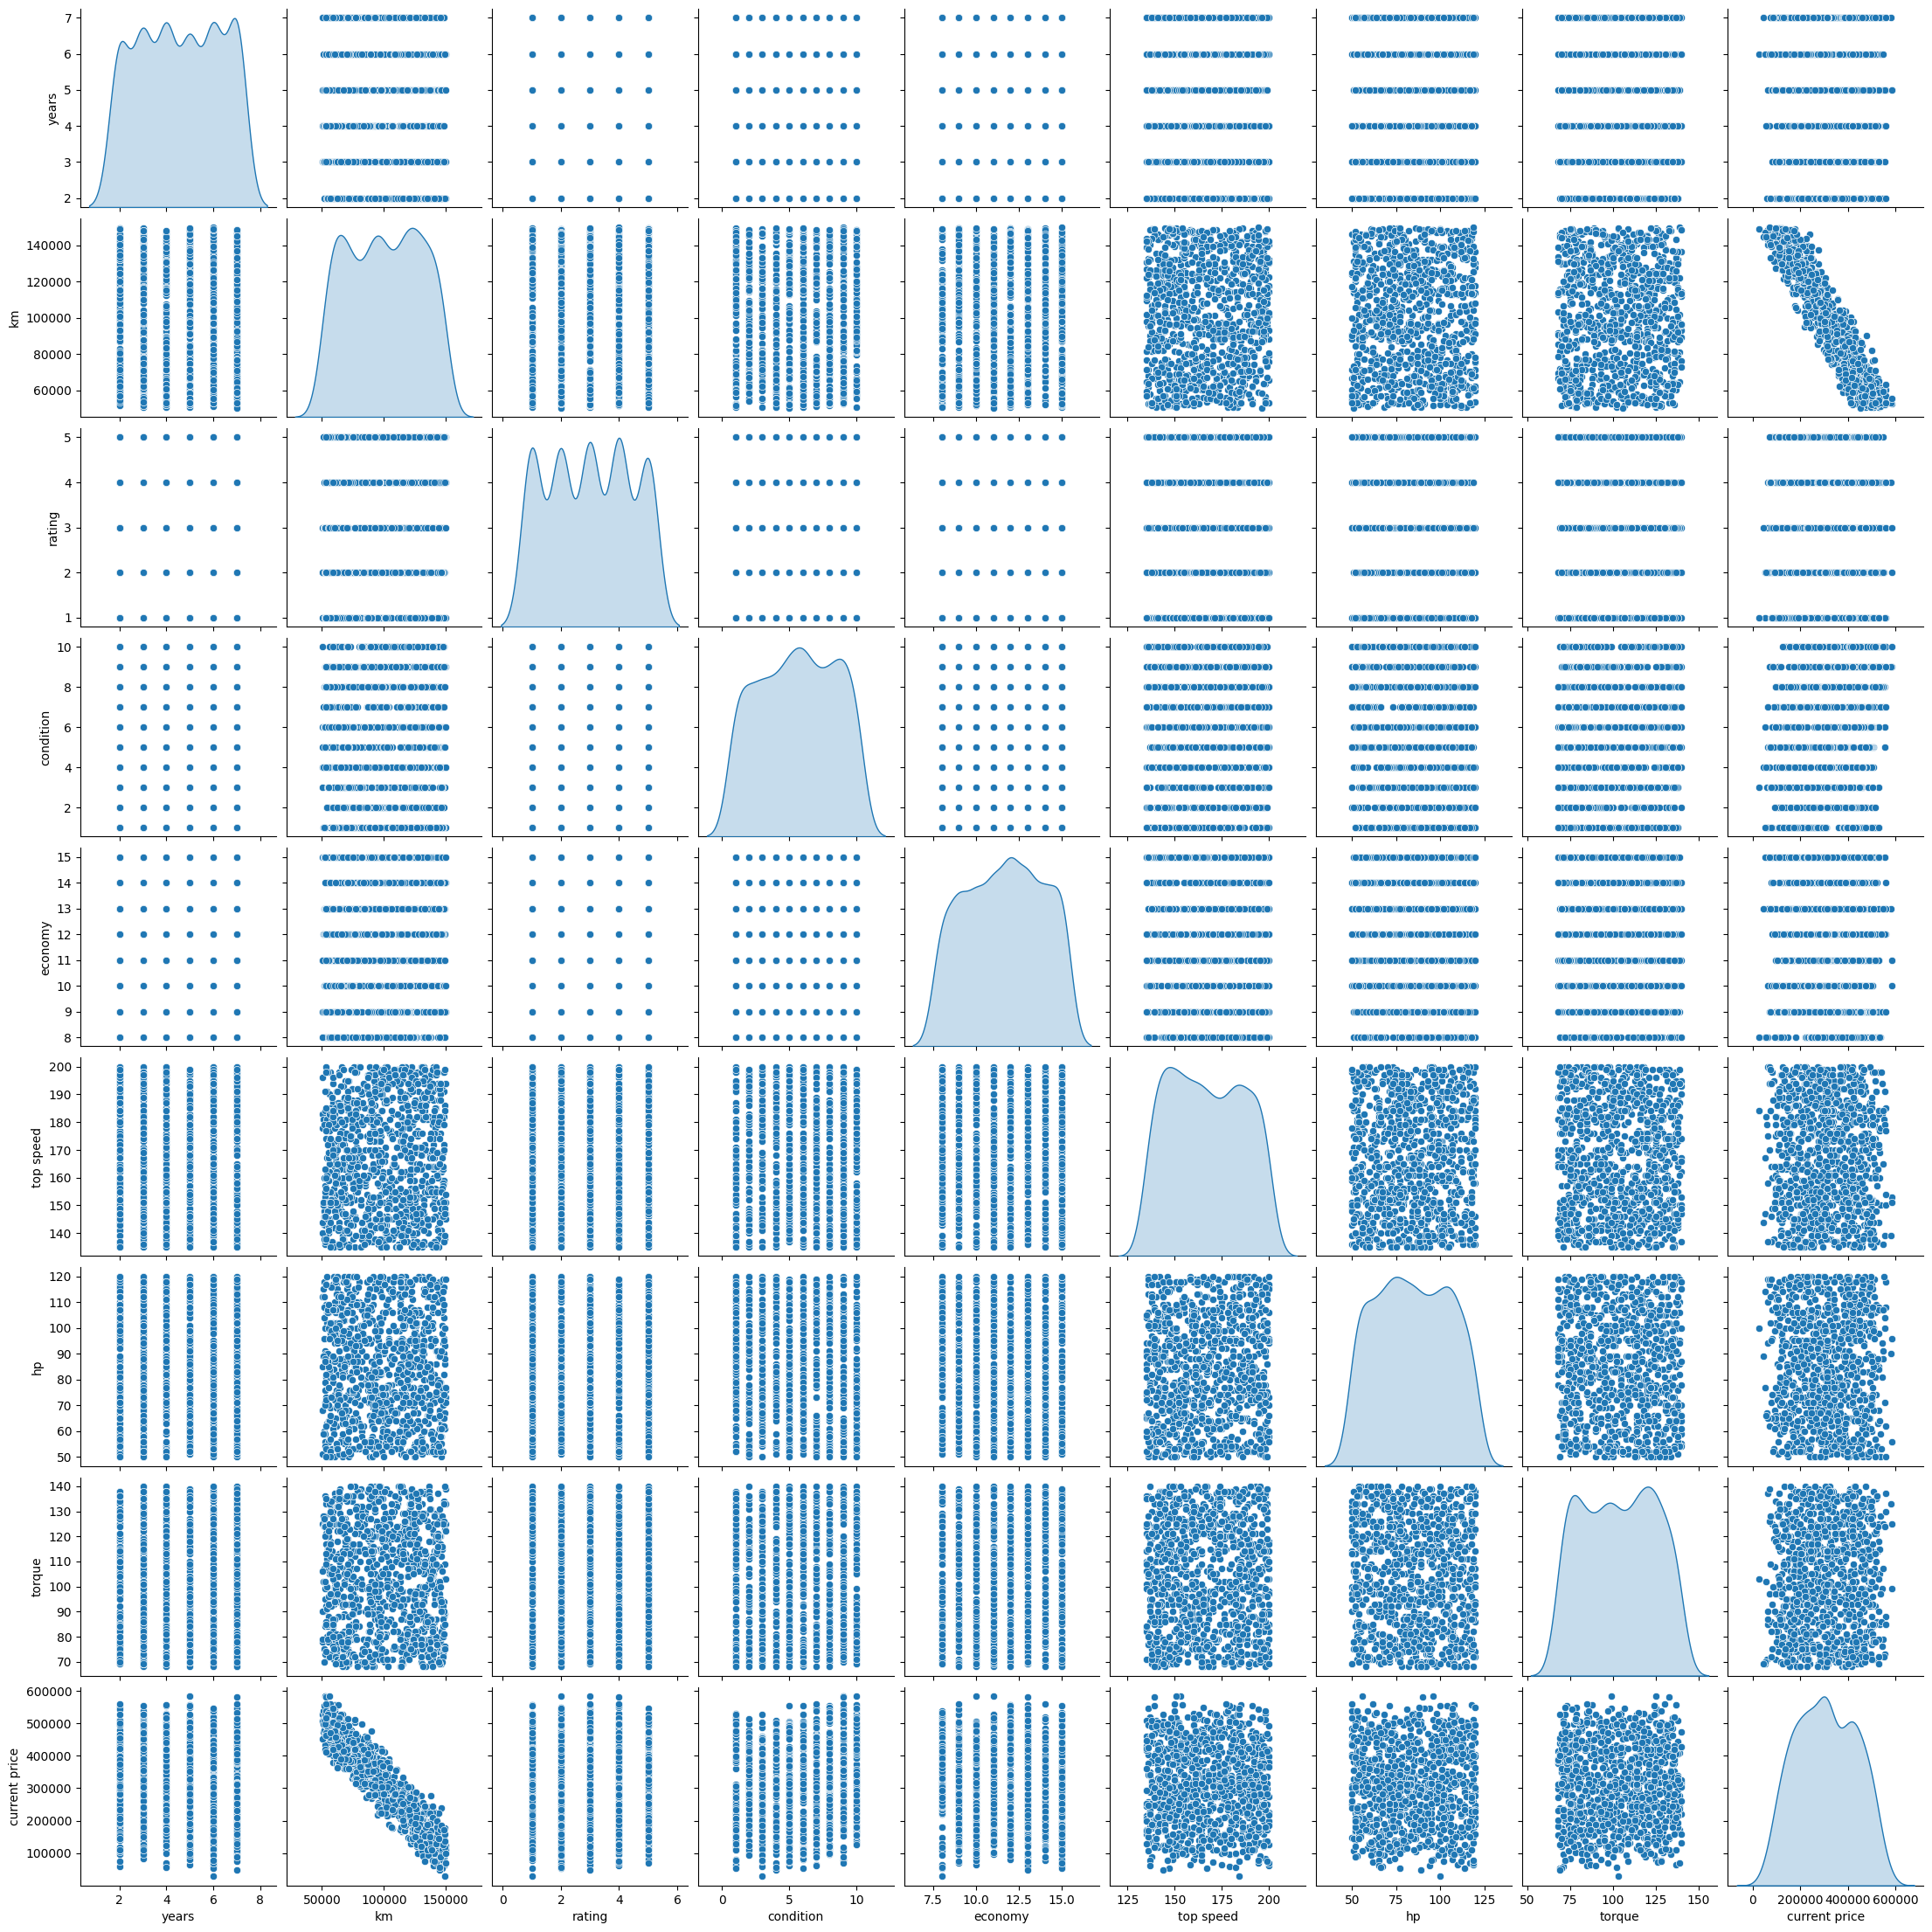

In [126]:
sns.pairplot(data[['years','km','rating','condition','economy','top speed','hp','torque','current price']],diag_kind='kde')

In [127]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data,tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [128]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[7.480000e+02, 6.114870e+05, 7.164520e+05, 2.000000e+00,
        9.060400e+04, 3.000000e+00, 3.000000e+00, 1.000000e+01,
        1.980000e+02, 5.000000e+01, 1.140000e+02, 3.020115e+05],
       [1.780000e+02, 6.539060e+05, 7.024900e+05, 4.000000e+00,
        6.008600e+04, 5.000000e+00, 2.000000e+00, 1.100000e+01,
        1.680000e+02, 1.070000e+02, 9.500000e+01, 4.391660e+05],
       [2.530000e+02, 5.871380e+05, 8.997020e+05, 3.000000e+00,
        1.141560e+05, 1.000000e+00, 2.000000e+00, 1.100000e+01,
        1.820000e+02, 9.500000e+01, 9.500000e+01, 2.869375e+05],
       [8.810000e+02, 6.507570e+05, 7.598670e+05, 7.000000e+00,
        6.995000e+04, 1.000000e+00, 7.000000e+00, 1.200000e+01,
        1.700000e+02, 1.110000e+02, 1.050000e+02, 4.257775e+05],
       [6.190000e+02, 5.640770e+05, 7.674550e+05, 6.000000e+00,
        1.330230e+05, 1.000000e+00, 3.000000e+00, 8.000000e+00,
        1.860000e+02, 6.000000e+01, 9.900000e+01, 1

In [129]:
X = tensor_data[:,3:-1]
print(X[:5])

tf.Tensor(
[[2.00000e+00 9.06040e+04 3.00000e+00 3.00000e+00 1.00000e+01 1.98000e+02
  5.00000e+01 1.14000e+02]
 [4.00000e+00 6.00860e+04 5.00000e+00 2.00000e+00 1.10000e+01 1.68000e+02
  1.07000e+02 9.50000e+01]
 [3.00000e+00 1.14156e+05 1.00000e+00 2.00000e+00 1.10000e+01 1.82000e+02
  9.50000e+01 9.50000e+01]
 [7.00000e+00 6.99500e+04 1.00000e+00 7.00000e+00 1.20000e+01 1.70000e+02
  1.11000e+02 1.05000e+02]
 [6.00000e+00 1.33023e+05 1.00000e+00 3.00000e+00 8.00000e+00 1.86000e+02
  6.00000e+01 9.90000e+01]], shape=(5, 8), dtype=float32)


In [130]:
y = tensor_data[:,-1]
print(y[:5].shape)

(5,)


In [131]:
y = tf.expand_dims(y, axis=-1)
print(y[:5])

tf.Tensor(
[[302011.5]
 [439166. ]
 [286937.5]
 [425777.5]
 [130112.5]], shape=(5, 1), dtype=float32)


In [132]:
normalizer = Normalization(axis= -1, mean=5, variance=4)
x_normalized = tf.constant([[3,4,5,6,7],[4,5,6,7,8]])

normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [133]:
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],[4,10,6,7,8],[32,1,56,3,5]])

normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.7439795 , -0.26726124, -0.72800297,  0.3922322 ,  0.2672614 ],
       [-0.6695816 ,  1.3363062 , -0.6860028 ,  0.9805806 ,  1.0690452 ],
       [ 1.4135611 , -1.069045  ,  1.4140056 , -1.3728131 , -1.3363061 ]],
      dtype=float32)>

In [134]:
print(X.shape)

(1000, 8)


In [135]:
TRAIN_RATION = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [136]:
X_train = X[:int(TRAIN_RATION*DATASET_SIZE)]
y_train = y[:int(TRAIN_RATION*DATASET_SIZE)]
print(X_train.shape, y_train.shape)

(800, 8) (800, 1)


In [137]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [138]:
for batch_x, batch_y in train_dataset.take(1):
    print(batch_x)
    print(batch_y)
    break

tf.Tensor(
[[7.00000e+00 6.99500e+04 1.00000e+00 7.00000e+00 1.20000e+01 1.70000e+02
  1.11000e+02 1.05000e+02]
 [4.00000e+00 6.00860e+04 5.00000e+00 2.00000e+00 1.10000e+01 1.68000e+02
  1.07000e+02 9.50000e+01]
 [4.00000e+00 5.24430e+04 2.00000e+00 6.00000e+00 1.50000e+01 1.63000e+02
  8.80000e+01 1.24000e+02]
 [7.00000e+00 6.09440e+04 4.00000e+00 6.00000e+00 1.10000e+01 1.51000e+02
  1.16000e+02 1.11000e+02]
 [3.00000e+00 1.14156e+05 1.00000e+00 2.00000e+00 1.10000e+01 1.82000e+02
  9.50000e+01 9.50000e+01]
 [2.00000e+00 9.06040e+04 3.00000e+00 3.00000e+00 1.00000e+01 1.98000e+02
  5.00000e+01 1.14000e+02]
 [6.00000e+00 7.75700e+04 5.00000e+00 3.00000e+00 9.00000e+00 1.82000e+02
  1.09000e+02 7.90000e+01]
 [3.00000e+00 6.47510e+04 5.00000e+00 1.00000e+00 1.10000e+01 1.76000e+02
  6.80000e+01 7.00000e+01]
 [6.00000e+00 1.30732e+05 4.00000e+00 9.00000e+00 1.00000e+01 1.35000e+02
  9.00000e+01 8.30000e+01]
 [3.00000e+00 8.54310e+04 5.00000e+00 1.00000e+00 1.30000e+01 1.47000e+02
  9.40

In [139]:
X_val = X[int(DATASET_SIZE*TRAIN_RATION):int(DATASET_SIZE*(TRAIN_RATION + VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATION):int(DATASET_SIZE*(TRAIN_RATION + VAL_RATIO))]
print(X_val.shape, y_val.shape)

(100, 8) (100, 1)


In [140]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [141]:
print(f"y.shape: {y.shape}")
print(f"DATASET_SIZE: {DATASET_SIZE}")
print(f"TRAIN_RATION: {TRAIN_RATION}")
print(f"VAL_RATIO: {VAL_RATIO}")
print(f"Start index: {int(DATASET_SIZE*TRAIN_RATION)}")
print(f"End index: {int(DATASET_SIZE*(TRAIN_RATION + VAL_RATIO))}")
print(f"Expected y_val size: {int(DATASET_SIZE*(TRAIN_RATION + VAL_RATIO)) - int(DATASET_SIZE*TRAIN_RATION)}")

y.shape: (1000, 1)
DATASET_SIZE: 1000
TRAIN_RATION: 0.8
VAL_RATIO: 0.1
Start index: 800
End index: 900
Expected y_val size: 100


In [142]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATION + VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATION + VAL_RATIO)):]
print(X_test.shape, y_test.shape)

(100, 8) (100, 1)


In [143]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [144]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-1.4964876 , -0.32772717,  0.00797268, -0.9108313 , -0.73794264,
         1.5754313 , -1.7003307 ,  0.49700567],
       [-0.32735664, -1.3713629 ,  1.4253352 , -1.2699565 , -0.28417322,
         0.02104893,  1.0933238 , -0.40480697],
       [-0.9119221 ,  0.47768965, -1.4093897 , -1.2699565 , -0.28417322,
         0.74642736,  0.505186  , -0.40480697],
       [ 1.4263397 , -1.03404   , -1.4093897 ,  0.5256694 ,  0.1695962 ,
         0.12467442,  1.2893697 ,  0.06983127],
       [ 0.8417743 ,  1.1228917 , -1.4093897 , -0.9108313 , -1.6454813 ,
         0.95367837, -1.2102159 , -0.21495168]], dtype=float32)>

In [145]:
X[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[2.00000e+00, 9.06040e+04, 3.00000e+00, 3.00000e+00, 1.00000e+01,
        1.98000e+02, 5.00000e+01, 1.14000e+02],
       [4.00000e+00, 6.00860e+04, 5.00000e+00, 2.00000e+00, 1.10000e+01,
        1.68000e+02, 1.07000e+02, 9.50000e+01],
       [3.00000e+00, 1.14156e+05, 1.00000e+00, 2.00000e+00, 1.10000e+01,
        1.82000e+02, 9.50000e+01, 9.50000e+01],
       [7.00000e+00, 6.99500e+04, 1.00000e+00, 7.00000e+00, 1.20000e+01,
        1.70000e+02, 1.11000e+02, 1.05000e+02],
       [6.00000e+00, 1.33023e+05, 1.00000e+00, 3.00000e+00, 8.00000e+00,
        1.86000e+02, 6.00000e+01, 9.90000e+01]], dtype=float32)>

## Model creation and training

In [146]:
model = tf.keras.Sequential([
  InputLayer(input_shape=(8,)),
  normalizer,
  Dense(128,activation="relu"),
  Dense(128,activation="relu"),
  Dense(128,activation="relu"),
  Dense(1)
])
model.summary()

C:\Users\GROUP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_13                │ (None, 8)              │            17 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [ ]:
tf.keras.utils.plot_model(model,to_file="model_plot.png", show_shapes=True)

In [148]:
model.compile(optimizer=Adam(learning_rate=0.1), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [149]:
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 75231166464.0000 - root_mean_squared_error: 269788.4062 - val_loss: 8339407360.0000 - val_root_mean_squared_error: 91320.3594
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5642855936.0000 - root_mean_squared_error: 74479.3906 - val_loss: 3095268864.0000 - val_root_mean_squared_error: 55635.1406
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3015513600.0000 - root_mean_squared_error: 54901.9609 - val_loss: 2499840256.0000 - val_root_mean_squared_error: 49998.4023
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2586525440.0000 - root_mean_squared_error: 50846.4023 - val_loss: 2314804736.0000 - val_root_mean_squared_error: 48112.4180
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2368403712.0000 - root_mean_squared_error: 48656.2148 - val_loss: 2355977216.0000 - val_root_mean_squared_error: 48538.4102
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2379714560.0000 - root_

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()